GitHub [link](https://github.com/MYUSER/MYPROJECT/)!

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [41]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

Run the following cell to load the packages you will need.

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [43]:
import pandas as pd
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [44]:
#Converting the dataframe to array
dataset = df.values

In [45]:
dataset

array([[ 0.37797, -0.94808,  0.01346, ...,  1.69027,  0.61609,  0.     ],
       [ 0.07609, -0.09774,  0.39666, ..., -1.2764 , -0.60496,  1.     ],
       [ 1.19391, -0.68707, -0.68422, ...,  0.43555,  0.41982,  1.     ],
       ...,
       [-0.81564, -0.46034, -0.40044, ...,  0.10394, -0.33635,  1.     ],
       [ 0.09764, -0.0544 , -1.53883, ...,  0.84022, -0.13068,  1.     ],
       [ 0.48335,  1.66099, -1.98407, ..., -2.24746,  0.17192,  0.     ]])

Let's split the data into input features(X) and the features we wish to predict(Y)

In [46]:
X = dataset[:,0:512]

In [47]:
Y = dataset[:,512]

In [48]:
#Preprocessing thr data
#Using min-max scaler, which scales the dataset so that the input features lie between 0 and 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [49]:
X_scale  #Scaled dataset is stored in X_scale

array([[0.60465168, 0.29659094, 0.4190079 , ..., 0.69940055, 0.85783983,
        0.6143322 ],
       [0.54888769, 0.47248199, 0.48044681, ..., 0.48985921, 0.26827901,
        0.40141209],
       [0.75537404, 0.35058031, 0.30714805, ..., 0.37116986, 0.60849165,
        0.58010769],
       ...,
       [0.38416523, 0.39747894, 0.35264683, ..., 0.51582803, 0.54259141,
        0.44825085],
       [0.55286846, 0.48144678, 0.17012742, ..., 0.43880235, 0.68891097,
        0.48411447],
       [0.62411772, 0.83627161, 0.09874156, ..., 0.50023235, 0.07530207,
        0.53688023]])

Spliting the dataset into a training set, validation set and a test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [51]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [52]:
#Printing the shape of the arrays
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(3150, 512) (675, 512) (675, 512) (3150,) (675,) (675,)


# Building the Neural Network

In [53]:
#Building the Neural Network Model
from keras.models import Sequential
from keras.layers import Dense

In [54]:
#Declaring the hidden layers
model = Sequential(
    [Dense(32, activation='relu', input_shape=(512,)),
     Dense(32, activation='relu'),
     Dense(1, activation='sigmoid'),])

In [55]:
#Compiling the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Training

Now, let's start our training.

In [56]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size=32,
                 epochs=100,
                 validation_data=(X_val, Y_val))

Train on 3150 samples, validate on 675 samples
Epoch 1/100
3150/3150 [==============================] - 0s 105us/step - loss: 0.6631 - accuracy: 0.6089 - val_loss: 0.6439 - val_accuracy: 0.6430
Epoch 2/100
3150/3150 [==============================] - 0s 120us/step - loss: 0.6503 - accuracy: 0.6289 - val_loss: 0.6383 - val_accuracy: 0.6430
Epoch 3/100
3150/3150 [==============================] - 0s 48us/step - loss: 0.6447 - accuracy: 0.6289 - val_loss: 0.6324 - val_accuracy: 0.6430
Epoch 4/100
3150/3150 [==============================] - 0s 50us/step - loss: 0.6373 - accuracy: 0.6295 - val_loss: 0.6210 - val_accuracy: 0.6430
Epoch 5/100
3150/3150 [==============================] - 0s 44us/step - loss: 0.6239 - accuracy: 0.6330 - val_loss: 0.6088 - val_accuracy: 0.6430
Epoch 6/100
3150/3150 [==============================] - 0s 47us/step - loss: 0.6047 - accuracy: 0.6644 - val_loss: 0.5933 - val_accuracy: 0.6459
Epoch 7/100
3150/3150 [==============================] - 0s 150us/step - lo

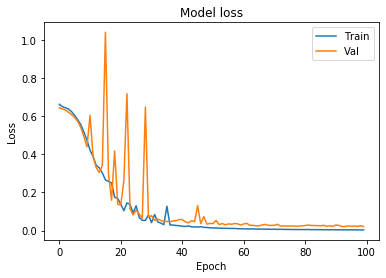

In [57]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

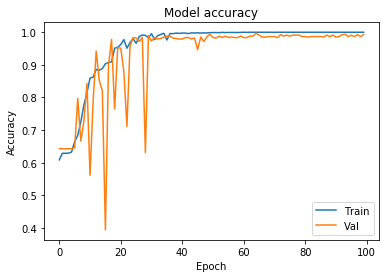

In [58]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Task 2

Test the model on the test set.

In [59]:
#Evaluating the accuracy of the model by applying the test data on the trained data
a = model.evaluate(X_test, Y_test)[1]
print('Accuracy is:', a*100)

675/675 [==============================] - 0s 47us/step
Accuracy is: 99.70370531082153


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

